# 8 (a)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                        summarize,
                        poly)

In [2]:
# data import
df = pd.read_csv("../data/Auto.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [4]:
df = df[df.horsepower != "?"]
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [5]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [7]:
# creating input
X = pd.DataFrame({"intercept": np.ones(df.shape[0]),
              "horsepower": df.horsepower})
X = X.astype(float)
X

,intercept,horsepower
0,1.0,130.0
1,1.0,165.0
2,1.0,150.0
3,1.0,150.0
4,1.0,140.0
...,...,...
392,1.0,86.0
393,1.0,52.0
394,1.0,84.0
395,1.0,79.0


In [8]:
# checking dtypes
X.dtypes

intercept     float64
horsepower    float64
dtype: object

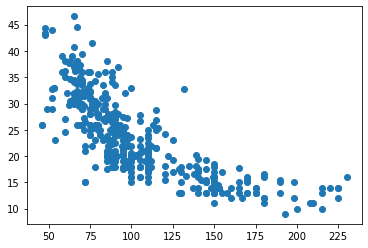

In [10]:
# visualizing
y = df["mpg"]
plt.scatter(X["horsepower"], y);

In [11]:
# fitting model
model = sm.OLS(y, X)
result = model.fit()

In [12]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           7.03e-81
Time:                        19:08:25   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (i)
The following suggest that there is a relationship between the predictor and the response:
- There is a pattern in the visualization
- The p value for the t-statistic for the horsepower predictor is extremely low
- The F-statistic is high
- The R-squared value indicates that 60% of the variability in the data is explained by the predictor

### (ii)

The R-squared value indicates that 60% of the variability in the data is explained by the predictor

### (iii)
The coefficient for the horsepower predictor is negative, indicating a negative relationship

### (iv)

In [14]:
# creating a df for getting predictions
pred_df = pd.DataFrame({"intercept": np.zeros(1),
                       "horsepower": 98})
pred_df

,intercept,horsepower
0,0.0,98


In [15]:
preds = result.get_prediction(pred_df)
print(f"The predicted mpg is {preds.predicted_mean[0]}")

The predicted mpg is -15.468783868658047


In [16]:
print(f"95% Confidence interval: {preds.conf_int(alpha=0.05)[0]}")
print(f"95% Prediction interval: {preds.conf_int(obs=True, alpha=0.05)[0]}")

95% Confidence interval: [-16.71066683 -14.22690091]
95% Prediction interval: [-25.19344545  -5.74412228]


# (b)

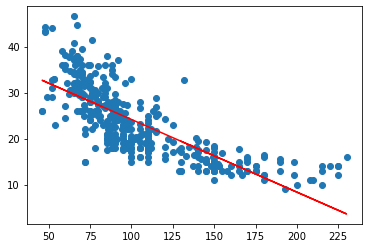

In [17]:
plt.scatter(X.horsepower, y)
plt.plot(X.horsepower, result.fittedvalues, color="red");

# (c)

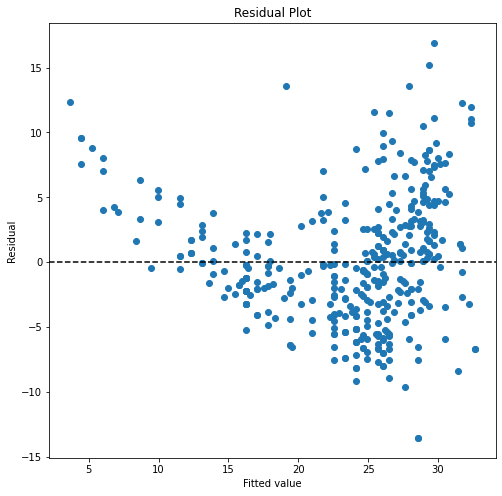

In [18]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(result.fittedvalues, result.resid)
ax.set_title("Residual Plot")
ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual"),
ax.axhline(0, c="k", ls="--");

115

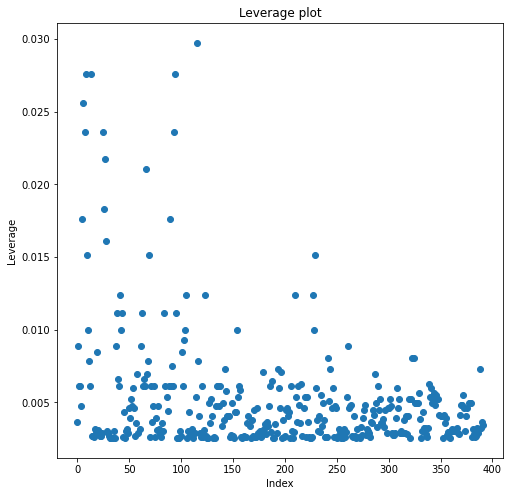

In [19]:
infl = result.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_title("Leverage plot")
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

Insights:
- There is a pattern in the residual plot, indicating non-linearity in the relationship
- There is the presence of some high leverage points

# 9 (a)

C:\Users\Amruthaa\AppData\Local\Temp\ipykernel_4360\1290974948.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(df, ax=ax);


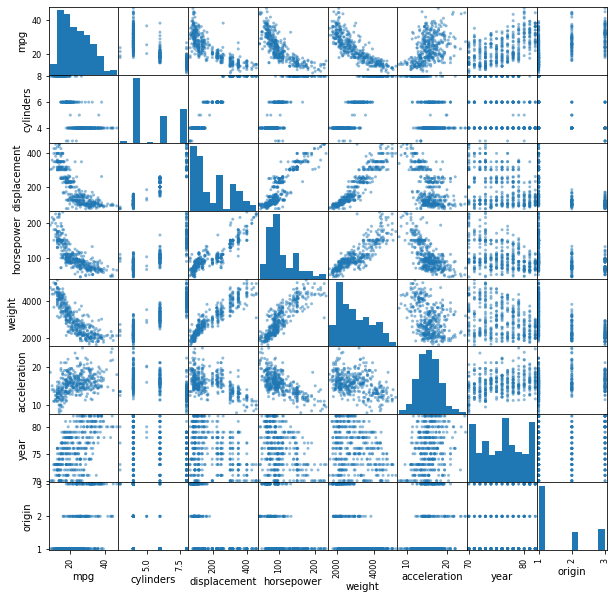

In [24]:
# scatterplot matrix
df.horsepower = df.horsepower.astype(float)
fig, ax = plt.subplots(figsize=(10, 10))
pd.plotting.scatter_matrix(df, ax=ax);

# (b)

In [25]:
df.corr()

C:\Users\Amruthaa\AppData\Local\Temp\ipykernel_4360\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


# (c)

In [26]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [27]:
# multiple regression without name col
predictors = df.columns.drop(["mpg", "name"])
predictors

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [28]:
Xmlr = MS(predictors).fit_transform(df)
mlr = sm.OLS(y, Xmlr.astype(float))
mlr_results = mlr.fit()
mlr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          2.04e-139
Time:                        19:11:46   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (i)

The F-statistic is significantly high, which indicates that there is a relationship between the predictors and the response

### (ii)

In [29]:
# predictors in decreasing order of significance
mlr_results.pvalues.sort_values()

year            3.055983e-39
weight          7.874953e-21
origin          4.665681e-07
intercept       2.401841e-04
displacement    8.444649e-03
cylinders       1.277965e-01
horsepower      2.196328e-01
acceleration    4.154780e-01
dtype: float64

### (iii)

The coefficient of the year variable is 0.7508. This means that keeping all other predictors fixed, a unit increase in year leads to 0.7508 units inncrease in mpg

# (d)

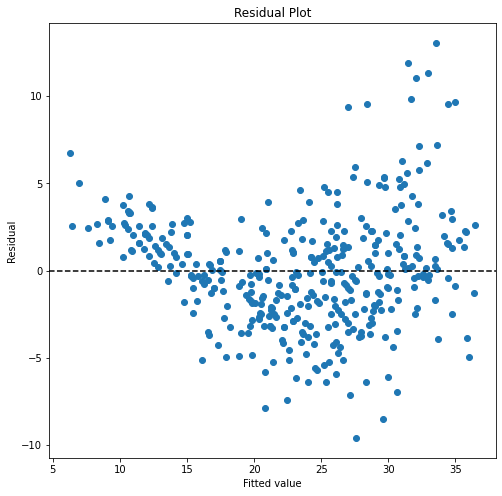

In [30]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(mlr_results.fittedvalues, mlr_results.resid)
ax.set_title("Residual Plot")
ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual"),
ax.axhline(0, c="k", ls="--");

13

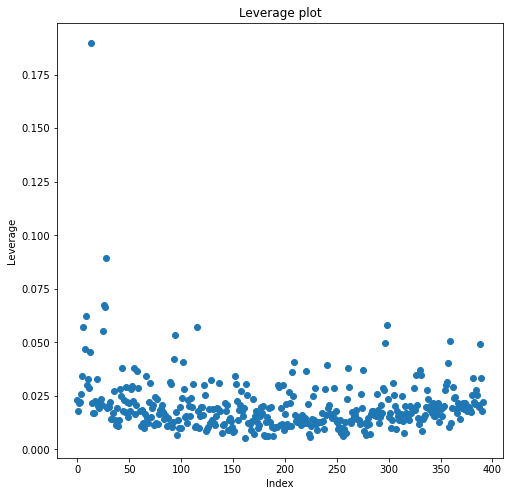

In [31]:
infl = mlr_results.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_title("Leverage plot")
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

- The residuals do not have any large outliers, but there is a patterned distribution
- Sample 13 is a leverage point

# (e)

In [32]:
# finding correlating terms
corr = df.drop("mpg", axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\Amruthaa\AppData\Local\Temp\ipykernel_4360\3567427778.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop("mpg", axis=1).corr()


,cylinders,displacement,horsepower,weight,acceleration,year,origin
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


some correlated terms:
- displacement and cylinders
- weight and cylinders
- weight and displacement

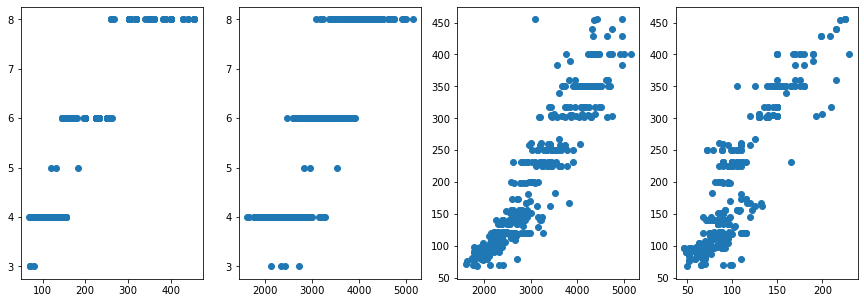

In [34]:
# visualizing correlations
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].scatter(df["displacement"], df["cylinders"]);
ax[1].scatter(df["weight"], df["cylinders"]);
ax[2].scatter(df["weight"], df["displacement"]);
ax[3].scatter(df["horsepower"], df["displacement"]);

In [35]:
# trying a model with weight-displacement interaction term
X_interaction = MS(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                   'year', 'origin', ("weight", "displacement")]).fit_transform(df)
interaction = sm.OLS(y, X_interaction.astype(float))
interaction_results = interaction.fit()
interaction_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     291.1
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          1.27e-157
Time:                        19:13:00   Log-Likelihood:                -977.57
No. Observations:                 392   AIC:                             1973.
Df Residuals:                     383   BIC:                             2009.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept              -5.3892      4.301     -1.253      0.211     -13.845       3.066
cylinders               0.1175      0.294      0.399      0.690      -0.461       0.696
displacement           -0.0684      0.011     -6.193      0.000      -0.090      -0.047
horsepower             -0.0328      0.012     -2.649      0.008      -0.057      -0.008
weight                 -0.0106      0.001    -14.915      0.000      -0.012      -0.009
acceleration            0.0672      0.088      0.764      0.446      -0.106       0.240
year                    0.7852      0.046     17.246      0.000       0.696       0.875
origin                  0.5610      0.262      2.139      0.033       0.045       1.077
weight:displacement  2.269e-05   2.26e-06     10.054      0.000    1.83e-05    2.71e-05
==============================================================================
Omnibus:                       47.095   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.127
Skew:                           0.646   Prob(JB):                     1.10e-22
Kurtosis:                       5.127   Cond. No.                     2.42e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The weight-displacement interaction term shows significance because,
- The p-value of the interaction term is very small
- There is a small increase in R-squared from 0.821 to 0.859

# (f)

In [36]:
corr = df.corr().sort_values(by=["mpg"], key=lambda x: abs(x), ascending=False)
corr.style.background_gradient(cmap='coolwarm')

C:\Users\Amruthaa\AppData\Local\Temp\ipykernel_4360\1286593752.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().sort_values(by=["mpg"], key=lambda x: abs(x), ascending=False)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746


mpg has strong correlations with weight, displacement, horsepower and cylinders

In [41]:
# experimenting with square of weight predictor
X = MS(['cylinders', 'displacement', 'horsepower', poly("weight", degree = 2), 'acceleration',
                   'year', 'origin', ("weight", "displacement")]).fit_transform(df)
model = sm.OLS(y, X.astype(float))
model_results = model.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     258.1
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          2.16e-156
Time:                        19:17:23   Log-Likelihood:                -977.53
No. Observations:                 392   AIC:                             1975.
Df Residuals:                     382   BIC:                             2015.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept                   -37.1741      4.786     -7.768      0.000     -46.584     -27.765
cylinders                     0.0866      0.318      0.273      0.785      -0.538       0.711
displacement                 -0.0618      0.028     -2.236      0.026      -0.116      -0.007
horsepower                   -0.0322      0.013     -2.548      0.011      -0.057      -0.007
poly(weight, degree=2)[0]  -172.6619     26.297     -6.566      0.000    -224.366    -120.957
poly(weight, degree=2)[1]     2.7052     10.374      0.261      0.794     -17.692      23.102
acceleration                  0.0670      0.088      0.760      0.448      -0.106       0.240
year                          0.7867      0.046     17.113      0.000       0.696       0.877
origin                        0.5704      0.265      2.152      0.032       0.049       1.092
weight:displacement        2.086e-05    7.4e-06      2.818      0.005     6.3e-06    3.54e-05
==============================================================================
Omnibus:                       47.787   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.796
Skew:                           0.654   Prob(JB):                     4.77e-23
Kurtosis:                       5.140   Cond. No.                     1.57e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The p-value for poly(weight, degree=2)[1] is high, indicating that there is no statistical significance for the squared term

# 10 (a)

In [58]:
cs = load_data("CarSeats")
cs.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [59]:
cs.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [66]:
X = cs[["Price", "Urban", "US"]]
X = pd.get_dummies(X, drop_first = True)
X

,Price,Urban_Yes,US_Yes
0,120,1,1
1,83,1,1
2,80,1,1
3,97,1,1
4,128,1,0
...,...,...,...
395,128,1,1
396,120,0,1
397,159,1,1
398,95,1,1


In [67]:
X["intercept"] = np.ones(X.shape[0])
X

,Price,Urban_Yes,US_Yes,intercept
0,120,1,1,1.0
1,83,1,1,1.0
2,80,1,1,1.0
3,97,1,1,1.0
4,128,1,0,1.0
...,...,...,...,...
395,128,1,1,1.0
396,120,0,1,1.0
397,159,1,1,1.0
398,95,1,1,1.0


In [68]:
y = cs["Sales"]
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [70]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           2.39e-23
Time:                        21:08:26   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban_Yes     -0.0219      0.272     -0.081      0.936      -0.556       0.512
US_Yes         1.2006      0.259      4.635      0.000       0.691       1.710
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# (b)
- Coef for price is negative. As price increases, sales decreases
- Coef for Urban_Yes indicates the decrease in sales if Urban is true
- Coef for US_Yes indicates the increase in price if US is true
- Intercept coef indicates that in the absence of all other predictors, the sales is non-zero

# (d)

Null hypothesis can be rejected for Price, US and intercept due to the small p-values

# (e)

In [72]:
X2 = cs[["Price", "US"]]
X2 = pd.get_dummies(X2, drop_first = True)
X2["intercept"] = np.ones(X2.shape[0])
X2

,Price,US_Yes,intercept
0,120,1,1.0
1,83,1,1.0
2,80,1,1.0
3,97,1,1.0
4,128,0,1.0
...,...,...,...
395,128,1,1.0
396,120,1,1.0
397,159,1,1.0
398,95,1,1.0


In [73]:
model2 = sm.OLS(y, X2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           2.66e-24
Time:                        21:16:21   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US_Yes         1.1996      0.258      4.641      0.000       0.692       1.708
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# (f)

The R2 score for both models is same. However the F-value is observed to increase for model2. Also, model2 achieves the same R2 score as the 1st model with a smaller number of predictors

But the R2 score for both the models is low, and hence both models do not fit the data well.

# (g)

In [74]:
# 95% confidence intervals
results2.conf_int(alpha=0.05)

,0,1
Price,-0.06476,-0.044195
US_Yes,0.69152,1.707766
intercept,11.79032,14.271265


# (h)

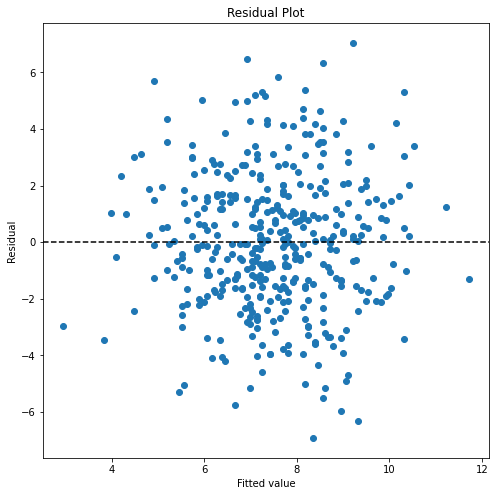

In [75]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results2.fittedvalues, results2.resid)
ax.set_title("Residual Plot")
ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual"),
ax.axhline(0, c="k", ls="--");

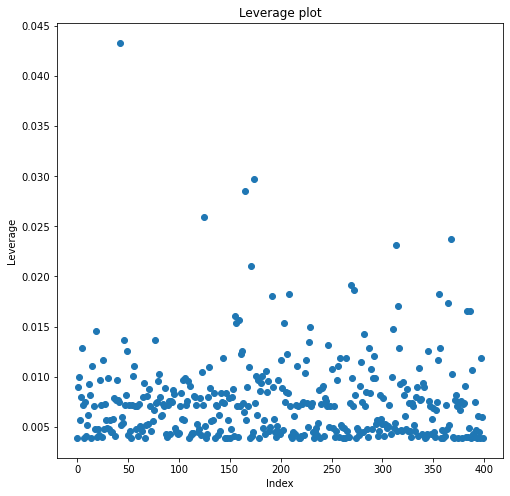

In [78]:
infl = results2.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_title("Leverage plot")
ax.set_xlabel('Index')
ax.set_ylabel('Leverage');

- The residuals don't have any discernible patterns
- There are some high leverage points present.

# 11 (a)

In [79]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

In [85]:
# performing simple linear regression without an intercept
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Sat, 28 Oct 2023   Prob (F-statistic):                    6.23e-31
Time:                        21:28:49   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the t-statistic, p-value and standard error, we can conclude that there is a relationship between X and y

# (b)

In [86]:
# regressing x onto y 
model_y = sm.OLS(x, y)
results_y = model_y.fit()
results_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Sat, 28 Oct 2023   Prob (F-statistic):                    6.23e-31
Time:                        21:33:20   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3757      0.022     16.898      0.000       0.332       0.420
==============================================================================
Omnibus:                       13.156   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.596
Skew:                          -0.528   Prob(JB):                     1.24e-05
Kurtosis:                       5.075   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again, we can conclude that there is a relationship between y and x

# (c)

The F-statistic, R-squared and t-values in both cases are the same. 

# 12 (a)

The only difference in the coefficient estimates is the denominator. For the coefficients to be equal, the sum of sqaures of x and y must be equal

# (b)

In [26]:
x = np.arange(1, 101)
y = 2*x
x, y

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100]),
 array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
         28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
         54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
         80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104,
        106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130,
        132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 1

In [13]:
xy_model = sm.OLS(x, y)
xy_results = xy_model.fit()
xy_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.216e+33
Date:                Mon, 30 Oct 2023   Prob (F-statistic):                        0.00
Time:                        15:08:43   Log-Likelihood:                          3061.1
No. Observations:                 100   AIC:                                     -6120.
Df Residuals:                      99   BIC:                                     -6118.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5000   1.06e-17   4.71e+16      0.000       0.500       0.500
==============================================================================
Omnibus:                       10.285   Durbin-Watson:                   0.018
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.545
Skew:                           0.670   Prob(JB):                      0.00513
Kurtosis:                       3.857   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
yx_model = sm.OLS(y, x)
yx_results = yx_model.fit()
yx_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.216e+33
Date:                Mon, 30 Oct 2023   Prob (F-statistic):                        0.00
Time:                        15:09:13   Log-Likelihood:                          2991.7
No. Observations:                 100   AIC:                                     -5981.
Df Residuals:                      99   BIC:                                     -5979.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0000   4.25e-17   4.71e+16      0.000       2.000       2.000
==============================================================================
Omnibus:                       10.285   Durbin-Watson:                   0.018
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.545
Skew:                           0.670   Prob(JB):                      0.00513
Kurtosis:                       3.857   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# coefficient estimates are unequal
xy_results.params == yx_results.params

array([False])

# (c)

In [33]:
# y is just a random shuffling of x
# so sum of squares becomes equal

x = np.arange(1, 101)
y = np.arange(1, 101)
np.random.shuffle(y)

In [37]:
xy_model = sm.OLS(x, y)
xy_results = xy_model.fit()
xy_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.592
Model:                            OLS   Adj. R-squared (uncentered):              0.588
Method:                 Least Squares   F-statistic:                              143.8
Date:                Mon, 30 Oct 2023   Prob (F-statistic):                    5.36e-21
Time:                        15:21:48   Log-Likelihood:                         -503.37
No. Observations:                 100   AIC:                                      1009.
Df Residuals:                      99   BIC:                                      1011.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7696      0.064     11.991      0.000       0.642       0.897
==============================================================================
Omnibus:                        2.516   Durbin-Watson:                   0.664
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.651
Skew:                           0.026   Prob(JB):                        0.438
Kurtosis:                       2.373   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
yx_model = sm.OLS(y, x)
yx_results = yx_model.fit()
yx_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.592
Model:                            OLS   Adj. R-squared (uncentered):              0.588
Method:                 Least Squares   F-statistic:                              143.8
Date:                Mon, 30 Oct 2023   Prob (F-statistic):                    5.36e-21
Time:                        15:22:06   Log-Likelihood:                         -503.37
No. Observations:                 100   AIC:                                      1009.
Df Residuals:                      99   BIC:                                      1011.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7696      0.064     11.991      0.000       0.642       0.897
==============================================================================
Omnibus:                        3.323   Durbin-Watson:                   1.121
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                1.996
Skew:                          -0.076   Prob(JB):                        0.369
Kurtosis:                       2.325   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# estimated coefficients are equal
xy_results.params == yx_results.params

array([ True])

# 13 (a)

In [40]:
# setting random seed
rng = np.random.default_rng(1)

In [44]:
x = rng.normal(0, 1, 100)
x

array([ 3.45584192e-01,  8.21618144e-01,  3.30437076e-01, -1.30315723e+00,
        9.05355867e-01,  4.46374572e-01, -5.36953235e-01,  5.81118104e-01,
        3.64572396e-01,  2.94132497e-01,  2.84222413e-02,  5.46712987e-01,
       -7.36454087e-01, -1.62909948e-01, -4.82119313e-01,  5.98846213e-01,
        3.97221075e-02, -2.92456751e-01, -7.81908462e-01, -2.57192241e-01,
        8.14218052e-03, -2.75602905e-01,  1.29406381e+00,  1.00672432e+00,
       -2.71116248e+00, -1.88901325e+00, -1.74772092e-01, -4.22190412e-01,
        2.13642997e-01,  2.17321931e-01,  2.11783876e+00, -1.11202076e+00,
       -3.77605007e-01,  2.04277161e+00,  6.46702996e-01,  6.63063372e-01,
       -5.14006372e-01, -1.64807517e+00,  1.67464744e-01,  1.09014088e-01,
       -1.22735205e+00, -6.83226662e-01, -7.20436797e-02, -9.44751623e-01,
       -9.82699679e-02,  9.54830275e-02,  3.55862371e-02, -5.06291658e-01,
        5.93748072e-01,  8.91166954e-01,  3.20848305e-01, -8.18230227e-01,
        7.31652284e-01, -

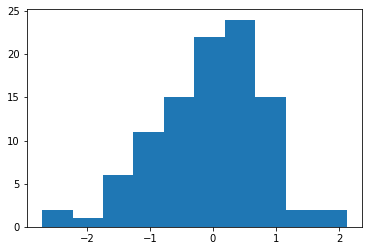

In [55]:
plt.hist(x);

# (b)

In [48]:
eps = rng.normal(0, 0.25, 100)
eps

array([-1.62820253e-01,  2.15611199e-01, -3.13980210e-02,  1.67288310e-01,
        3.04710901e-01,  9.57323957e-02, -2.18930286e-01, -3.78579658e-01,
        4.38346029e-01, -2.78230483e-02, -1.72141237e-01,  3.60642720e-02,
       -4.78528326e-02,  2.13035566e-01,  8.48204561e-03,  3.43739590e-03,
       -1.78644930e-01,  1.17392025e-01, -2.58466681e-01,  1.66472360e-01,
        3.80984378e-01, -3.81171510e-01, -6.16557308e-01,  1.54219689e-01,
        6.36974454e-01, -2.50231212e-01, -3.12673940e-01,  1.47242233e-01,
       -2.10180398e-01, -1.26506371e-01, -8.70293667e-02,  1.33000522e-01,
       -1.01325590e-01,  6.94707100e-02, -4.41333147e-02, -2.11167776e-01,
       -7.99565644e-02, -2.37599916e-01,  1.62874647e-03, -2.80966557e-01,
       -2.73223592e-01,  3.64240454e-01, -1.32960551e-02, -1.34755064e-02,
        1.27884105e-01, -1.05214251e-01, -5.71338419e-02,  1.06287184e-01,
        7.06039606e-02, -2.89824182e-01,  2.08335649e-01, -1.47608736e-01,
       -2.64019738e-01, -

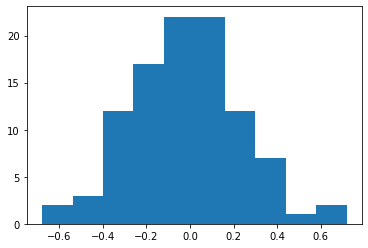

In [58]:
plt.hist(eps);

# (c)

In [59]:
y = -1 + (0.5 * x) + eps
y

array([-0.99002816, -0.37357973, -0.86617948, -1.48429031, -0.24261117,
       -0.68108032, -1.4874069 , -1.08802061, -0.37936777, -0.8807568 ,
       -1.15793012, -0.69057923, -1.41607988, -0.86841941, -1.23257761,
       -0.6971395 , -1.15878388, -1.02883635, -1.64942091, -0.96212376,
       -0.61494453, -1.51897296, -0.9695254 , -0.34241815, -1.71860679,
       -2.19473784, -1.40005999, -1.06385297, -1.1033589 , -1.01784541,
       -0.02810999, -1.42300986, -1.29012809,  0.09085651, -0.72078182,
       -0.87963609, -1.33695975, -2.0616375 , -0.91463888, -1.22645951,
       -1.88689962, -0.97737288, -1.04931789, -1.48585132, -0.92125088,
       -1.05747274, -1.03934072, -1.14685865, -0.632522  , -0.8442407 ,
       -0.6312402 , -1.55672385, -0.8981936 , -1.47583878, -0.65805603,
       -1.12906864, -0.83665037, -0.97001275, -2.15883053, -1.15734147,
       -0.74805726, -0.92277016, -1.64843279, -1.49580876, -0.7251698 ,
       -1.06746042, -0.38912873, -0.56794837, -1.97249621, -0.90

In [61]:
print(f"length of y is {len(y)}")
print(f"B0 = -1, B1 = 0.5")

length of y is 100
B0 = -1, B1 = 0.5


# (d)

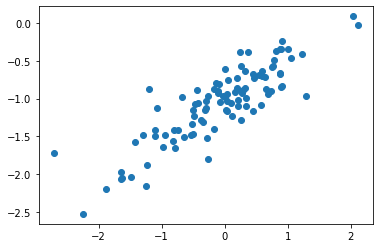

In [62]:
plt.scatter(x, y);

x and y are observed to have a linear relationship, with some noise added using eps

# (e)

In [73]:
X = pd.DataFrame({"intercept": np.ones(100),
    "x": x})
X

,intercept,x
0,1.0,0.345584
1,1.0,0.821618
2,1.0,0.330437
3,1.0,-1.303157
4,1.0,0.905356
...,...,...
95,1.0,-2.250854
96,1.0,-0.138655
97,1.0,0.033000
98,1.0,-1.425349


In [74]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.74e-30
Time:                        15:41:30   Log-Likelihood:                -2.4306
No. Observations:                 100   AIC:                             8.861
Df Residuals:                      98   BIC:                             14.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0190      0.025    -40.537      0.000      -1.069      -0.969
x              0.4921      0.029     16.734      0.000       0.434       0.551
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The model seems to be a good fit, as the R-squared value is 0.741, the F-statistic is high, and the p-value for both the predictors is very low
- The coefficient estimates are close to the true coefficients

# (f)

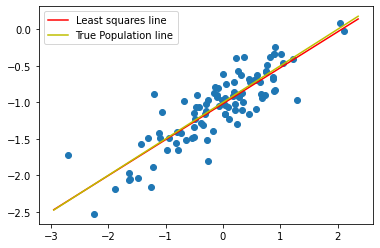

In [98]:
fig, ax = plt.subplots();
ax.scatter(X["x"], y)
xlim = ax.get_xlim() 
ols_ylim = [results.params[0]+xlim[0]*results.params[1],
        results.params[0]+xlim[1]*results.params[1]]
true_ylim = [-1+xlim[0]*0.5, -1+xlim[1]*0.5]
ols, = ax.plot(xlim, ols_ylim, "r")
true, = ax.plot(xlim, true_ylim, "y")
ax.legend([ols, true], ["Least squares line", "True Population line"]);

# (g)

In [100]:
# fitting a quadratic term
X = MS(["x", poly("x", degree=2)]).fit_transform(X)
X

,intercept,x,"poly(x, degree=2)[0]","poly(x, degree=2)[1]"
0,1.0,0.345584,0.049227,-0.036584
1,1.0,0.821618,0.105129,0.034593
2,1.0,0.330437,0.047448,-0.038177
3,1.0,-1.303157,-0.144388,0.032896
4,1.0,0.905356,0.114962,0.051342
...,...,...,...,...
95,1.0,-2.250854,-0.255678,0.294791
96,1.0,-0.138655,-0.007638,-0.067043
97,1.0,0.033000,0.012520,-0.061085
98,1.0,-1.425349,-0.158737,0.057565


In [101]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     138.6
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           3.66e-29
Time:                        16:00:24   Log-Likelihood:                -2.4293
No. Observations:                 100   AIC:                             10.86
Df Residuals:                      97   BIC:                             18.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -1.0194      0.025    -40.354      0.000      -1.070      -0.969
x                        0.4865      0.029     16.685      0.000       0.429       0.544
poly(x, degree=2)[0]     0.0483      0.003     14.008      0.000       0.041       0.055
poly(x, degree=2)[1]    -0.0131      0.252     -0.052      0.959      -0.513       0.487
==============================================================================
Omnibus:                        1.338   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.814
Skew:                           0.119   Prob(JB):                        0.666
Kurtosis:                       3.372   Cond. No.                     6.51e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.4e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- The p-value for the squared term is 0.959, indicating that the quadratic term doesn't increase the model.

# (h)

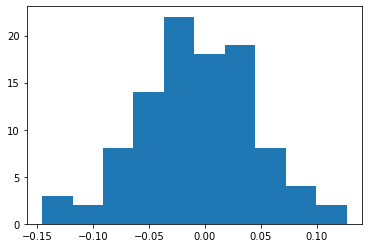

In [111]:
eps_less = rng.normal(0, 0.05, 100)
plt.hist(eps_less);

In [112]:
y_less = -1 + (0.5 * x) + eps_less

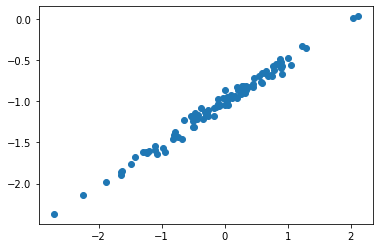

In [113]:
plt.scatter(x, y_less);

In [119]:
X_less = pd.DataFrame({"intercept": np.ones(100),
    "x": x})
model_less = sm.OLS(y_less, X_less)
results_less = model_less.fit()
results_less.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     6860.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.57e-92
Time:                        17:57:37   Log-Likelihood:                 154.83
No. Observations:                 100   AIC:                            -305.7
Df Residuals:                      98   BIC:                            -300.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0061      0.005   -192.876      0.000      -1.016      -0.996
x              0.5055      0.006     82.824      0.000       0.493       0.518
==============================================================================
Omnibus:                        0.284   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.868   Jarque-Bera (JB):                0.132
Skew:                          -0.088   Prob(JB):                        0.936
Kurtosis:                       3.022   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

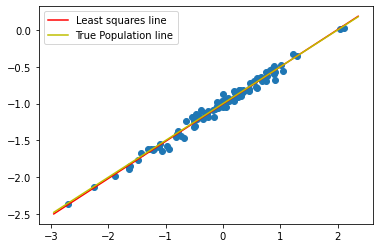

In [120]:
fig, ax = plt.subplots();
ax.scatter(X_less["x"], y_less)
xlim = ax.get_xlim() 
ols_ylim = [results_less.params[0]+xlim[0]*results_less.params[1],
        results_less.params[0]+xlim[1]*results_less.params[1]]
true_ylim = [-1+xlim[0]*0.5, -1+xlim[1]*0.5]
ols, = ax.plot(xlim, ols_ylim, "r")
true, = ax.plot(xlim, true_ylim, "y")
ax.legend([ols, true], ["Least squares line", "True Population line"]);

- The R-sqaured score for the model is higher when there is less noise
- Visually, the line is a better fit
- The F-statistic is much higher

# (i)

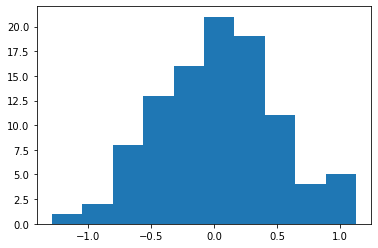

In [121]:
eps_more = rng.normal(0, 0.45, 100)
plt.hist(eps_more);

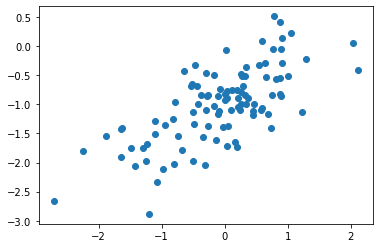

In [122]:
y_more = -1 + (0.5 * x) + eps_more
plt.scatter(x, y_more);

In [123]:
X_more = pd.DataFrame({"intercept": np.ones(100),
    "x": x})
model_more = sm.OLS(y_more, X_more)
results_more = model_more.fit()
results_more.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     93.33
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           6.59e-16
Time:                        18:02:52   Log-Likelihood:                -64.495
No. Observations:                 100   AIC:                             133.0
Df Residuals:                      98   BIC:                             138.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.9750      0.047    -20.852      0.000      -1.068      -0.882
x              0.5285      0.055      9.661      0.000       0.420       0.637
==============================================================================
Omnibus:                        0.194   Durbin-Watson:                   2.339
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.310
Skew:                          -0.096   Prob(JB):                        0.857
Kurtosis:                       2.807   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

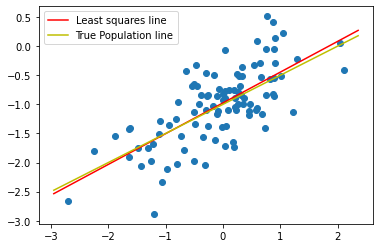

In [124]:
fig, ax = plt.subplots();
ax.scatter(X_more["x"], y_more)
xlim = ax.get_xlim() 
ols_ylim = [results_more.params[0]+xlim[0]*results_more.params[1],
        results_more.params[0]+xlim[1]*results_more.params[1]]
true_ylim = [-1+xlim[0]*0.5, -1+xlim[1]*0.5]
ols, = ax.plot(xlim, ols_ylim, "r")
true, = ax.plot(xlim, true_ylim, "y")
ax.legend([ols, true], ["Least squares line", "True Population line"]);

- The R-squared score is much lesser
- The F-statistic is also lesser

# (j)

As the noise increases, the range of the confidence interval also increases.

# 14 (a)

In [129]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# (b)

In [131]:
np.corrcoef(x1, x2)

array([[1.       , 0.7723245],
       [0.7723245, 1.       ]])

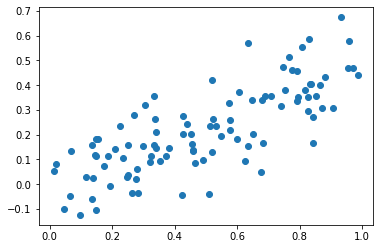

In [132]:
plt.scatter(x1, x2);

# (c)

In [133]:
df = pd.DataFrame({"x1": x1, "x2": x2})
df

,x1,x2
0,0.956002,0.469359
1,0.207682,0.142509
2,0.828445,0.587699
3,0.149282,0.181141
4,0.512805,0.236458
...,...,...
95,0.427256,0.273142
96,0.790513,0.456659
97,0.531602,0.236308
98,0.013037,0.054343


In [135]:
X = MS(["x1", "x2"]).fit_transform(df)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           5.76e-08
Time:                        18:27:58   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The estimated coefficients are 1.9579, 1.6154, 0.9428. The actual values are 2, 2, 0.3.
- The estimates for B0 and B1 are closer than the estimate for B2
- The null hypothesis B1 = 0 can be rejected, as the p-value is very low
- The null hypothesis B2 = 0 cannot be rejected, as it has a higher p-value of 0.259

# (d)

In [136]:
X = MS(["x1"]).fit_transform(df)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.37e-08
Time:                        18:36:55   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9371      0.189     10.242      0.000       1.562       2.312
x1             2.0771      0.335      6.196      0.000       1.412       2.742
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.042
Skew:                          -0.046   Prob(JB):                        0.979
Kurtosis:                       3.038   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- There is not much of a change in the R-squared value. However there is an increase in the F-statistic. 
- The p-value for x1 is lower than when x2 is also included.
- The coefficient is now much closer to 2
- The null hypothesis B1 = 0 can be rejected. 

# (e)

In [137]:
X = MS(["x2"]).fit_transform(df)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           7.43e-07
Time:                        18:39:35   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3239      0.154     15.124      0.000       2.019       2.629
x2             2.9103      0.550      5.291      0.000       1.819       4.002
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.373
Skew:                          -0.034   Prob(JB):                        0.830
Kurtosis:                       2.709   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The p-value for x2 is now 0
- The null hypothesis B1 = 0 can be rejected.

# (f)

The results from (c) and (e) contradict due to collinearity between x1 and x2

# (g)

In [138]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

In [140]:
df = pd.DataFrame({"x1": x1, "x2": x2})
df

,x1,x2
0,0.956002,0.469359
1,0.207682,0.142509
2,0.828445,0.587699
3,0.149282,0.181141
4,0.512805,0.236458
...,...,...
96,0.790513,0.456659
97,0.531602,0.236308
98,0.013037,0.054343
99,0.019875,0.079619


In [141]:
# model (c)
X = MS(["x1", "x2"]).fit_transform(df)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           4.60e-08
Time:                        19:07:38   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0618      0.192     10.720      0.000       1.680       2.443
x1             0.8575      0.466      1.838      0.069      -0.068       1.783
x2             2.2663      0.705      3.216      0.002       0.868       3.665
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.320
Skew:                           0.013   Prob(JB):                        0.852
Kurtosis:                       2.725   Cond. No.                         9.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
# model (d)
X = MS(["x1"]).fit_transform(df)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           9.23e-07
Time:                        19:08:26   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0739      0.201     10.310      0.000       1.675       2.473
x1             1.8760      0.358      5.236      0.000       1.165       2.587
==============================================================================
Omnibus:                        8.232   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.781
Skew:                           0.396   Prob(JB):                      0.00456
Kurtosis:                       4.391   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
# model (e)
X = MS(["x2"]).fit_transform(df)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           3.13e-08
Time:                        19:08:48   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2840      0.151     15.088      0.000       1.984       2.584
x2             3.1458      0.524      6.008      0.000       2.107       4.185
==============================================================================
Omnibus:                        0.495   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.631
Skew:                          -0.041   Prob(JB):                        0.729
Kurtosis:                       2.621   Cond. No.                         5.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# (15) a

In [144]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [161]:
y = Boston["crim"]
coefs = {}
for col in Boston.columns.drop("crim"):
    X = MS([col]).fit_transform(Boston)
    model = sm.OLS(y, X)
    results = model.fit()
    print(f"{col}\t{results.params[col]}\t{results.pvalues[col]}")
    coefs[col] = results.params[col]

zn	-0.07393497740412354	5.5064721076792834e-06
indus	0.5097763311042316	1.4503489330272395e-21
chas	-1.8927765508037597	0.20943450153520057
nox	31.2485312011229	3.751739260356978e-23
rm	-2.6840512241139476	6.346702984687803e-07
age	0.10778622713953309	2.8548693502441573e-16
dis	-1.5509016824100998	8.519948766926326e-19
rad	0.6179109273272018	2.693844398186058e-56
tax	0.029742252822765367	2.357126835257048e-47
ptratio	1.1519827870705854	2.942922447359795e-11
lstat	0.548804782062398	2.6542772314731968e-27
medv	-0.36315992225760296	1.1739870821943694e-19


In [162]:
coefs

{'zn': -0.07393497740412354,
 'indus': 0.5097763311042316,
 'chas': -1.8927765508037597,
 'nox': 31.2485312011229,
 'rm': -2.6840512241139476,
 'age': 0.10778622713953309,
 'dis': -1.5509016824100998,
 'rad': 0.6179109273272018,
 'tax': 0.029742252822765367,
 'ptratio': 1.1519827870705854,
 'lstat': 0.548804782062398,
 'medv': -0.36315992225760296}

All predictors except chas show a strong relationship with crim

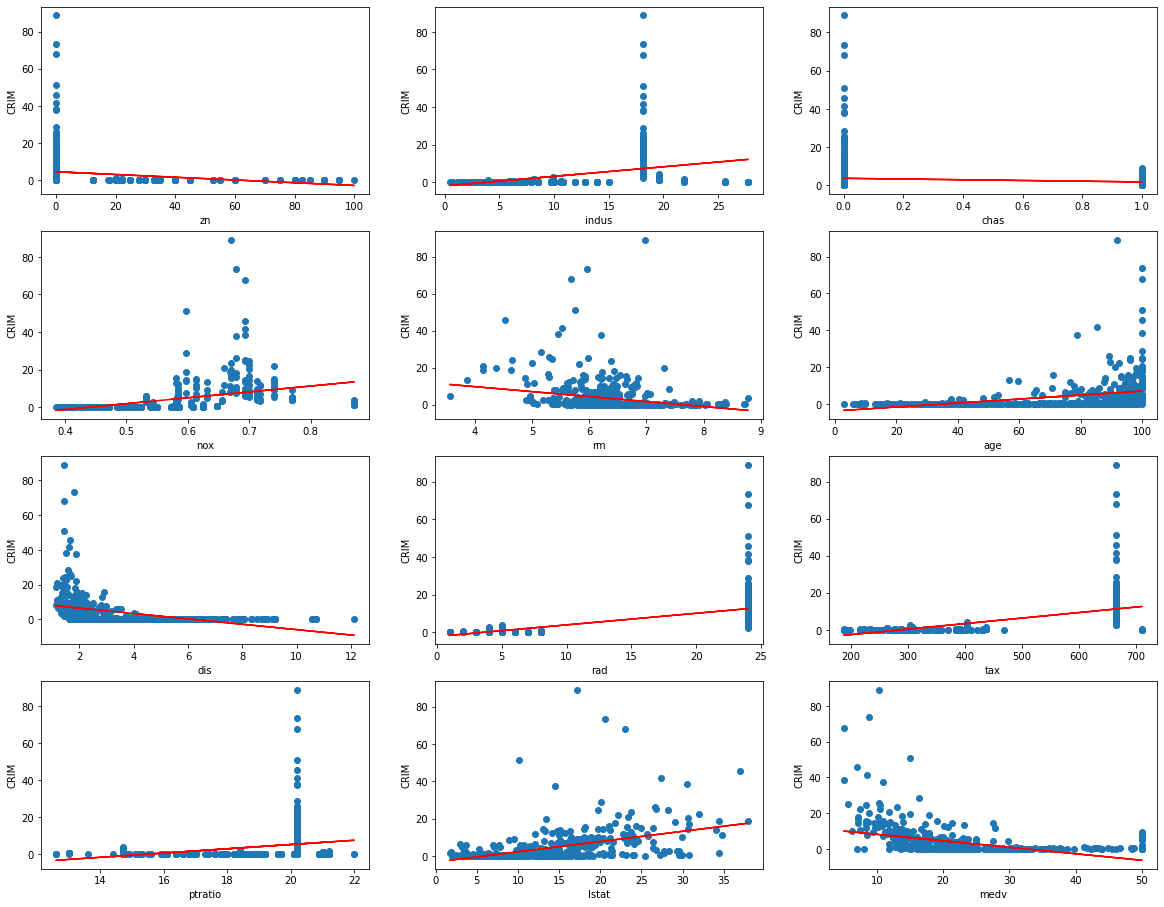

In [160]:
plt.figure(figsize=(20, 20))
cols = Boston.columns.drop("crim")

for i, col in enumerate(cols):
    X = MS([col]).fit_transform(Boston)
    model = sm.OLS(y, X)
    results = model.fit()
    plt.subplot(5,3,i+1)
    plt.xlabel(f"{col}")
    plt.ylabel("CRIM")
    plt.scatter(Boston[col], Boston["crim"])
    plt.plot(Boston[col], results.fittedvalues, color="red")

# (b)

In [163]:
# multiple regression with all predictors
X = MS(Boston.columns.drop("crim")).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           2.03e-56
Time:                        21:55:01   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can reject the null hypothesis for the following predictors:
- zn
- nox
- dis
- rad
- lstat
- medv

# (c)

In [170]:
results.params

intercept    13.778394
zn            0.045710
indus        -0.058350
chas         -0.825378
nox          -9.957587
rm            0.628911
age          -0.000848
dis          -1.012247
rad           0.612465
tax          -0.003776
ptratio      -0.304073
lstat         0.138801
medv         -0.220056
dtype: float64

In [171]:
coefs

{'zn': -0.07393497740412354,
 'indus': 0.5097763311042316,
 'chas': -1.8927765508037597,
 'nox': 31.2485312011229,
 'rm': -2.6840512241139476,
 'age': 0.10778622713953309,
 'dis': -1.5509016824100998,
 'rad': 0.6179109273272018,
 'tax': 0.029742252822765367,
 'ptratio': 1.1519827870705854,
 'lstat': 0.548804782062398,
 'medv': -0.36315992225760296}

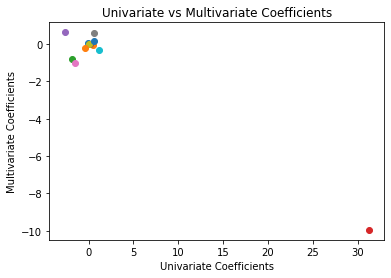

In [183]:
# plotting coefficients
plt.figure()
for col in coefs:
    plt.scatter(coefs[col], results.params[col])
plt.title("Univariate vs Multivariate Coefficients")
plt.xlabel("Univariate Coefficients")
plt.ylabel("Multivariate Coefficients");

# (d)

In [204]:
y = Boston["crim"]
for col in Boston.columns.drop("crim"):
    X = MS([poly(col, degree=3)]).fit_transform(Boston)
    model = sm.OLS(y, X)
    results = model.fit()
    print(f"-----------{col}---------")
    print(f"\n{results.params[1:]}")    
    print(f"\n{results.pvalues[1:]}")    

-----------zn---------

poly(zn, degree=3)[0]   -38.749835
poly(zn, degree=3)[1]    23.939832
poly(zn, degree=3)[2]   -10.071868
dtype: float64

poly(zn, degree=3)[0]    0.000005
poly(zn, degree=3)[1]    0.004421
poly(zn, degree=3)[2]    0.229539
dtype: float64
-----------indus---------

poly(indus, degree=3)[0]    78.590819
poly(indus, degree=3)[1]   -24.394796
poly(indus, degree=3)[2]   -54.129763
dtype: float64

poly(indus, degree=3)[0]    8.854243e-24
poly(indus, degree=3)[1]    1.086057e-03
poly(indus, degree=3)[2]    1.196405e-12
dtype: float64
-----------chas---------

poly(chas, degree=3)[0]   -0.039489
poly(chas, degree=3)[1]   -1.056290
poly(chas, degree=3)[2]    0.068412
dtype: float64

poly(chas, degree=3)[0]    3.943208e-08
poly(chas, degree=3)[1]    2.912172e-14
poly(chas, degree=3)[2]    7.348486e-01
dtype: float64
-----------nox---------

poly(nox, degree=3)[0]    81.372015
poly(nox, degree=3)[1]   -28.828594
poly(nox, degree=3)[2]   -60.361894
dtype: float64

poly(nox,

- From the p-values of the polynomial coefficients, there seems to be non-linearity in the relationships of some predictors